# Image Features Extraction

### A package for fast extraction of intra-regions feature values based on voroni tessellation from segmentable images 


# Introduction 

This package was built to compliment the extraction of measured values (image-features-extraction package) from segmentable parts of an image with measurements related to the relationships between images regions. The voronoi tessellation gives a measurement of teh local density of between the features and can be used to charachterize the spatial hetereogeneity between features

<img src="1.png">

## Features extraction for spatial Classification of nuclei

<img src="2b.png">

<img src="3.png">

## Collection objects and Iterators

<img src="4b.png">

# Tutorial

In [4]:
% matplotlib inline
import matplotlib.pyplot as plt
import image_features_extraction.Images as fe

    
IMGS = fe.Images('../images/CA/1')


# the iterator at work ...
for IMG in IMGS:
    print(IMG.file_name())
    


../images/CA/1/ORG_8bit.tif
../images/CA/1/ORG_bin.tif


## Show segmentation

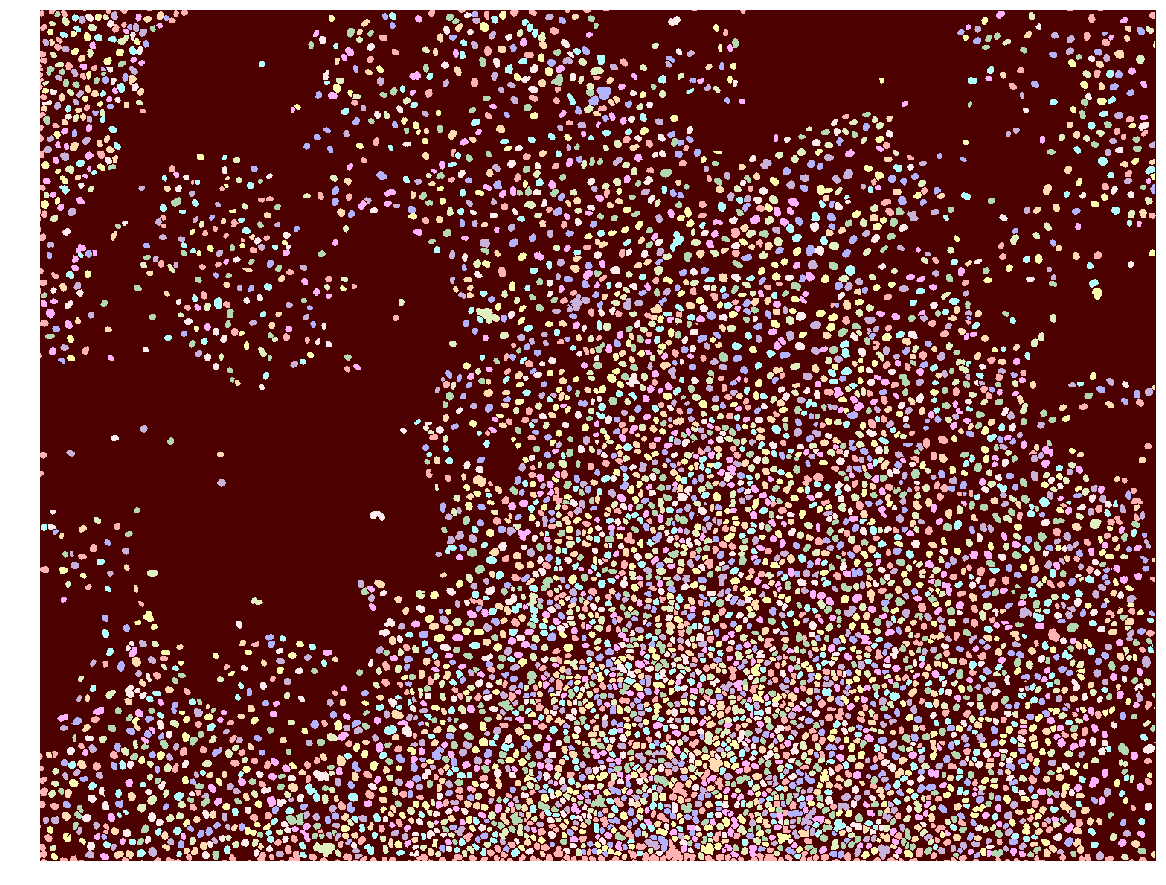

In [5]:

IMG = IMGS.item(1)

IMG.set_image_intensity(IMGS.item(0))

imgrgb = IMG.get_image_segmentation()


fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(imgrgb)

ax.set_axis_off()
plt.show()


## Features table

In [6]:
IMG = IMGS.item(0)

features = IMG.features(['label', 'area','perimeter', 'centroid'], class_value=5)

df = features.get_dataframe()

df.head()

label  area  perimeter  centroid_x   centroid_y  class_name
0     19    38  20.485281    4.552632   182.631579           5
1     20    72  29.556349    5.625000  1290.361111           5
2     21   116  44.970563    9.801724   585.103448           5
3     22    48  25.899495    6.895833   600.145833           5
4     23    68  27.899495    6.470588   621.588235           5

# VORONOI

## show centroids of regions

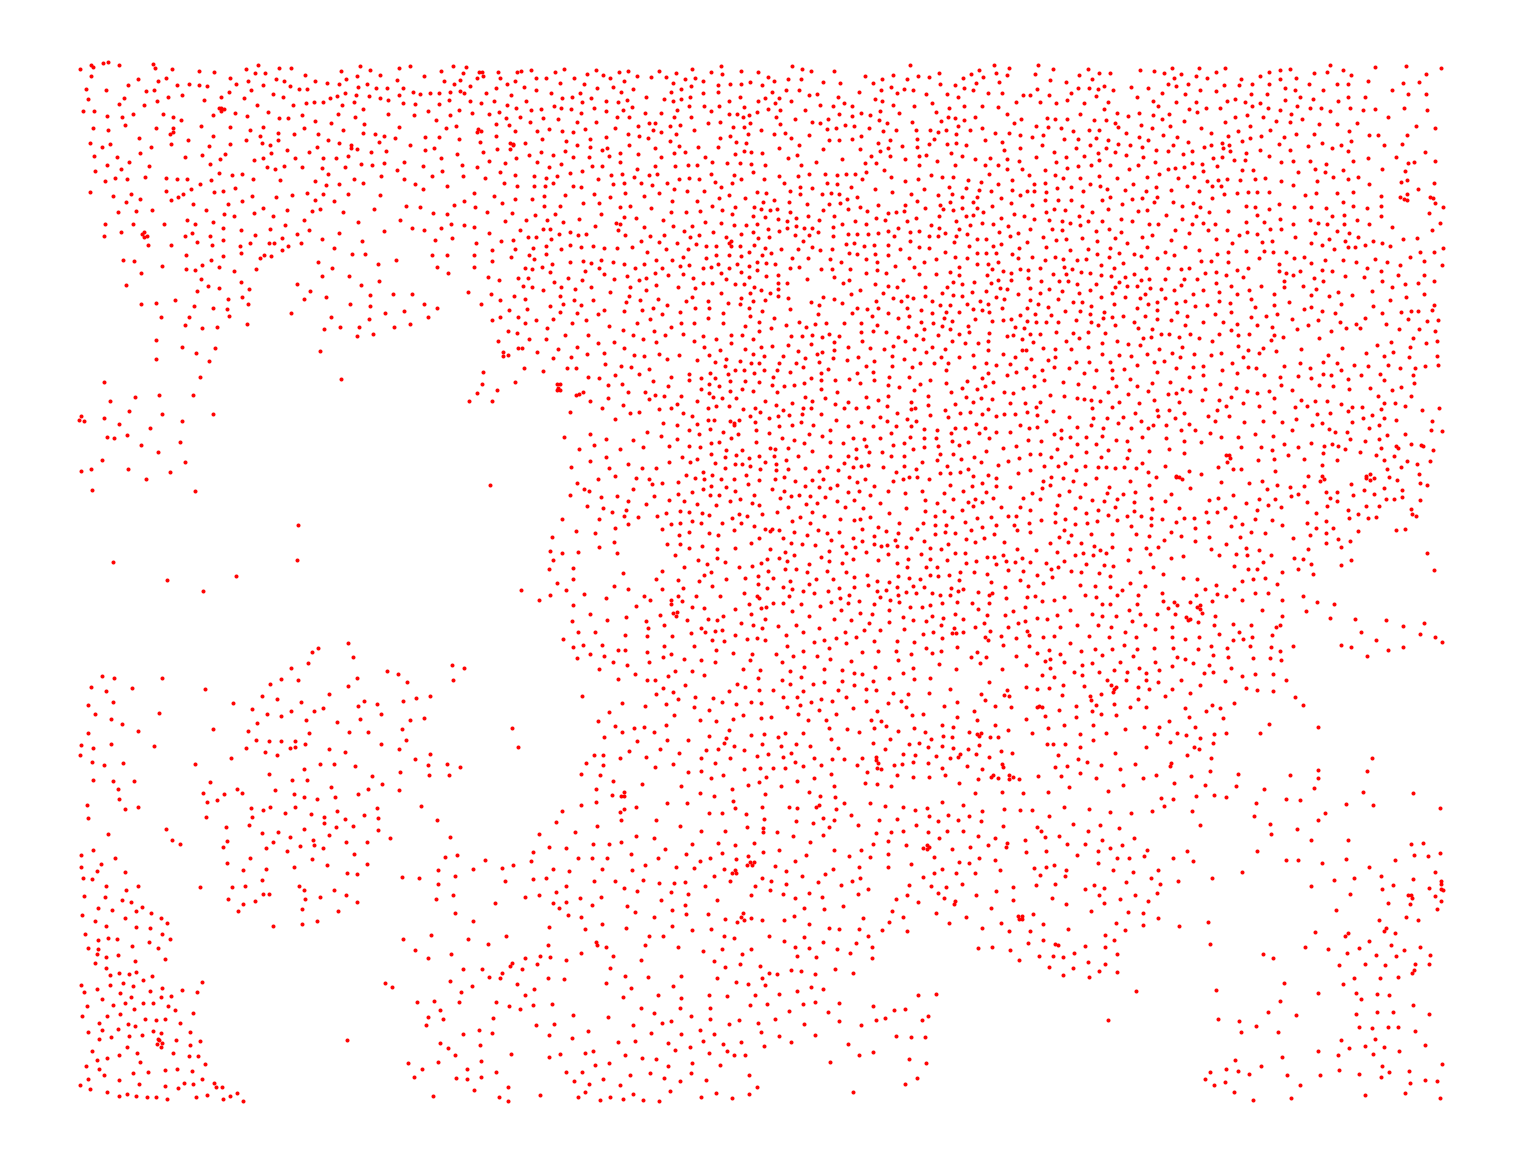

In [7]:

# Get x and y coordinates (ra and dec from the dataframe) into a
# numpy array to feed to the VT method
width = imgrgb.shape[1]
height = imgrgb.shape[0]

y = [i for i in df.centroid_y]
x = [i for i in df.centroid_x]

dpi = 72.
xinch = width / dpi
yinch = height / dpi

fig = plt.figure(figsize=(xinch,yinch))

ax = plt.axes([0., 0., 1., 1.], frameon=False, xticks=[],yticks=[])


plt.plot(y,x, '.r')


In [235]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import numpy as np 

# CALCULATE THE VORONOI TASSELLATIONS
#pos = np.array([list(i) for i in zip(y, x)])

pos = [list(i) for i in zip(y, x)]
vor = Voronoi(pos)


# show voronoi 

/Users/remi/anaconda/envs/remi_insight/lib/python3.5/site-packages/scipy/spatial/_plotutils.py:20: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = ax.ishold()


2448


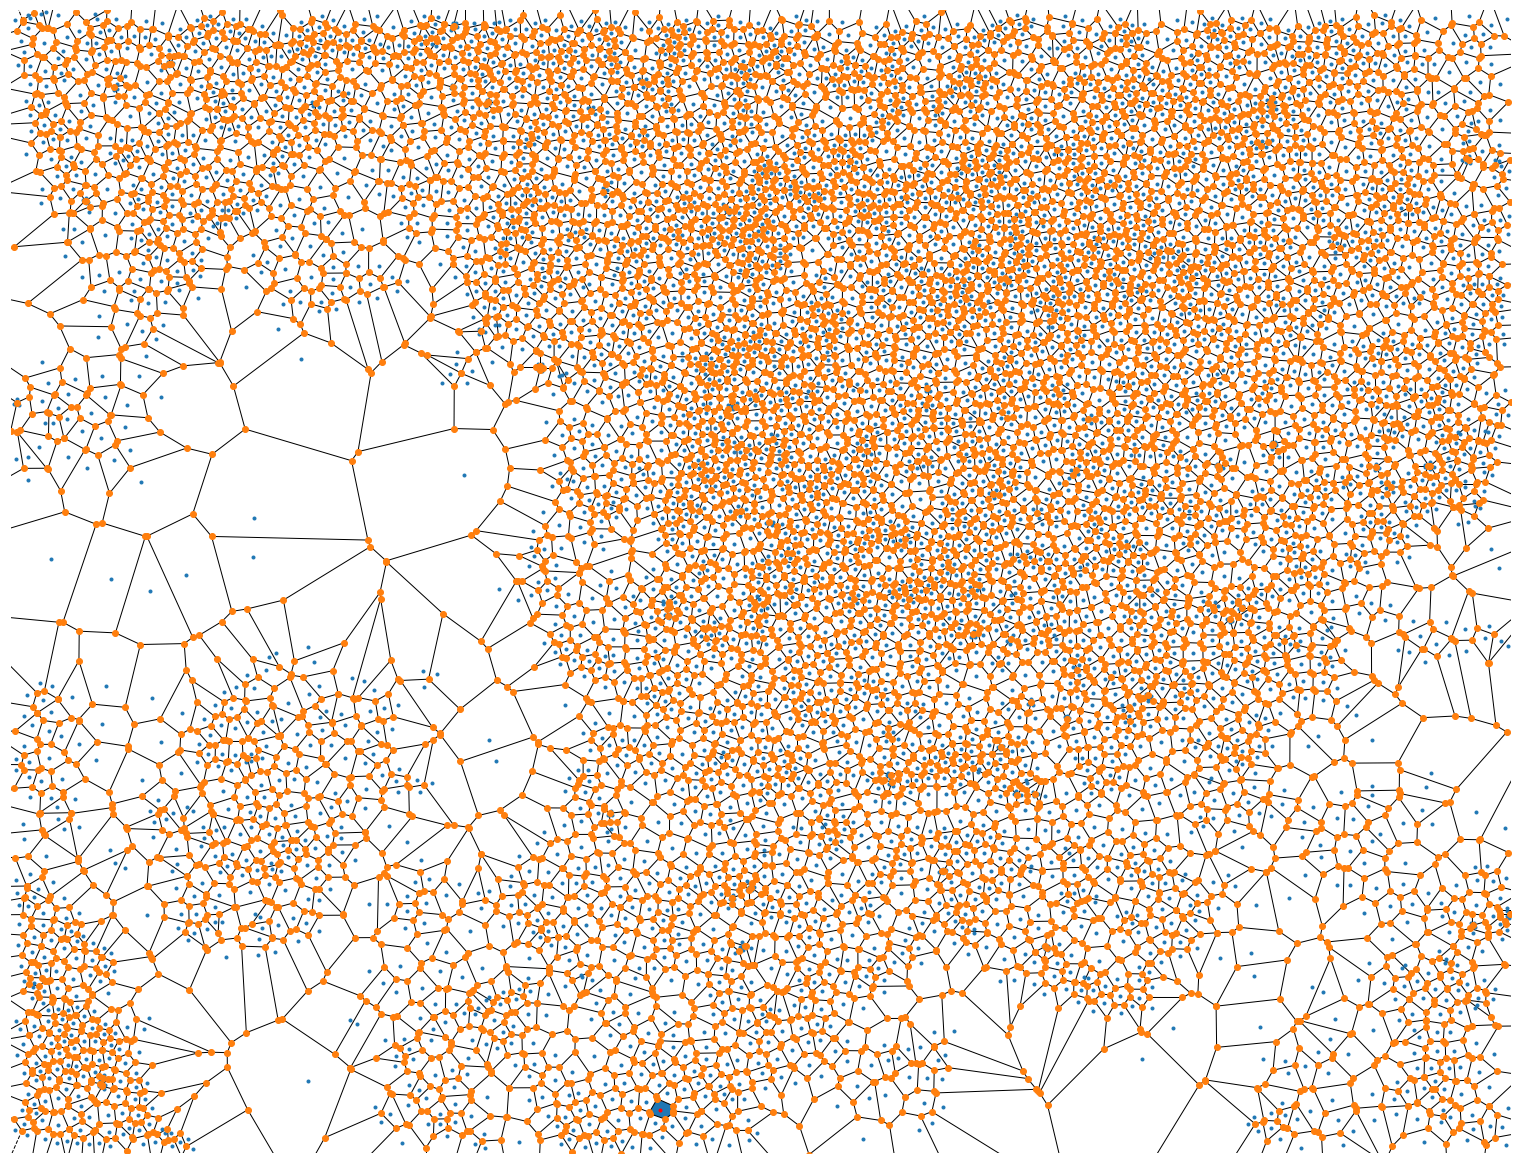

In [236]:
from PIL import Image
from io import StringIO, BytesIO

filename_temp = 'tempdar432dafasfa.png'

# GET THE VORONOI IMAGE

# get the size in inches
dpi = 72.
xinch = width / dpi
yinch = height / dpi

# plot and save in the same size as the original
fig = plt.figure(figsize=(xinch,yinch))

ax = plt.axes([0., 0., 1., 1.], frameon=False, xticks=[],yticks=[])

img = np.zeros((height, width), dtype=np.uint8)

#ax.imshow(img, interpolation='none')

voronoi_plot_2d(vor, ax = ax, show_points=True, show_vertices=True)
ax.set_xlim([0, width])
ax.set_ylim([0, height])


plt.savefig(filename_temp, dpi=dpi, transparent=True)

buf = BytesIO()
plt.savefig(buf,format='png', dpi=dpi)
buf.seek(0)
img = Image.open(buf).convert('L')
img.save(filename_temp)
buf.close()


idx = 100
i1 = vor.point_region[idx]
plt.plot(df.centroid_y[idx],df.centroid_x[idx],'.r', lw=10)

print(i1)
region = vor.regions[i1]
poly = [vor.vertices[i] for i in region]
plt.fill(*zip(*poly))



2448


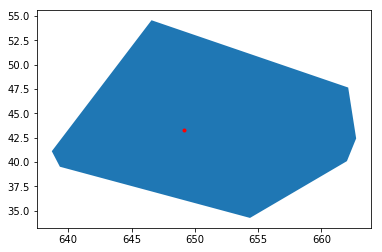

In [28]:

idx = 100
i1 = vor.point_region[idx]
plt.plot(df.centroid_y[idx],df.centroid_x[idx],'.r', lw=10)

print(i1)
region = vor.regions[i1]
poly = [vor.vertices[i] for i in region]
plt.fill(*zip(*poly))



56.0416305603


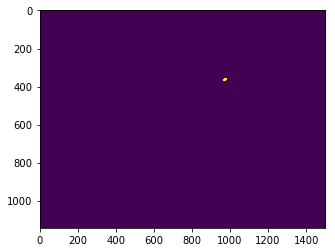

In [245]:
import math
import matplotlib.pyplot as plt
import numpy as np

from skimage.draw import ellipse, polygon
from skimage.measure import label, regionprops
from skimage.transform import rotate


image1 = np.zeros((height, width))

x = [a[0] for a in poly]
y = [a[1] for a in poly]
#polygon
#x = np.array([200, 400, 400, 200, 200])
# rectangle
#y = np.array([100, 100, 350, 350, 100])
# square
#y = np.array([150, 150, 350, 350, 150])

#rr, cc = ellipse(300, 350, 100, 220)
rr, cc = polygon(y, x)

image1[rr, cc] = 1

#image = rotate(image, angle=15, order=0)

label_img = label(image1)
regions = regionprops(label_img)

props = regions[0]

print(props.perimeter)

plt.imshow(image1)



1993
2509
[ 141.69565217   45.02898551]
141.695652174
1491


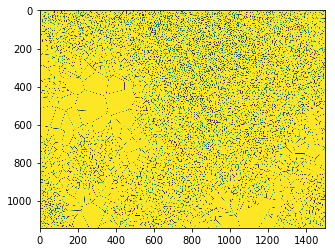

In [184]:
from PIL import Image, ImageDraw
from skimage import filters, io


print(V.point_region[10])

print(np.where(V.point_region == 10)[0][0])

print(V.points[110])

print(df.centroid_y[110])


i = np.where(V.point_region == 110)[0][0]

print(i)
region = V.regions[i]
polygon = [V.vertices[i] for i in region]
plt.fill(*zip(*polygon))
    
plt.imshow(img)


In [143]:
from  PIL.ImageOps import invert
from numpy import array

img2 = invert(img)

vor_img = rgb2gray(array(img2))



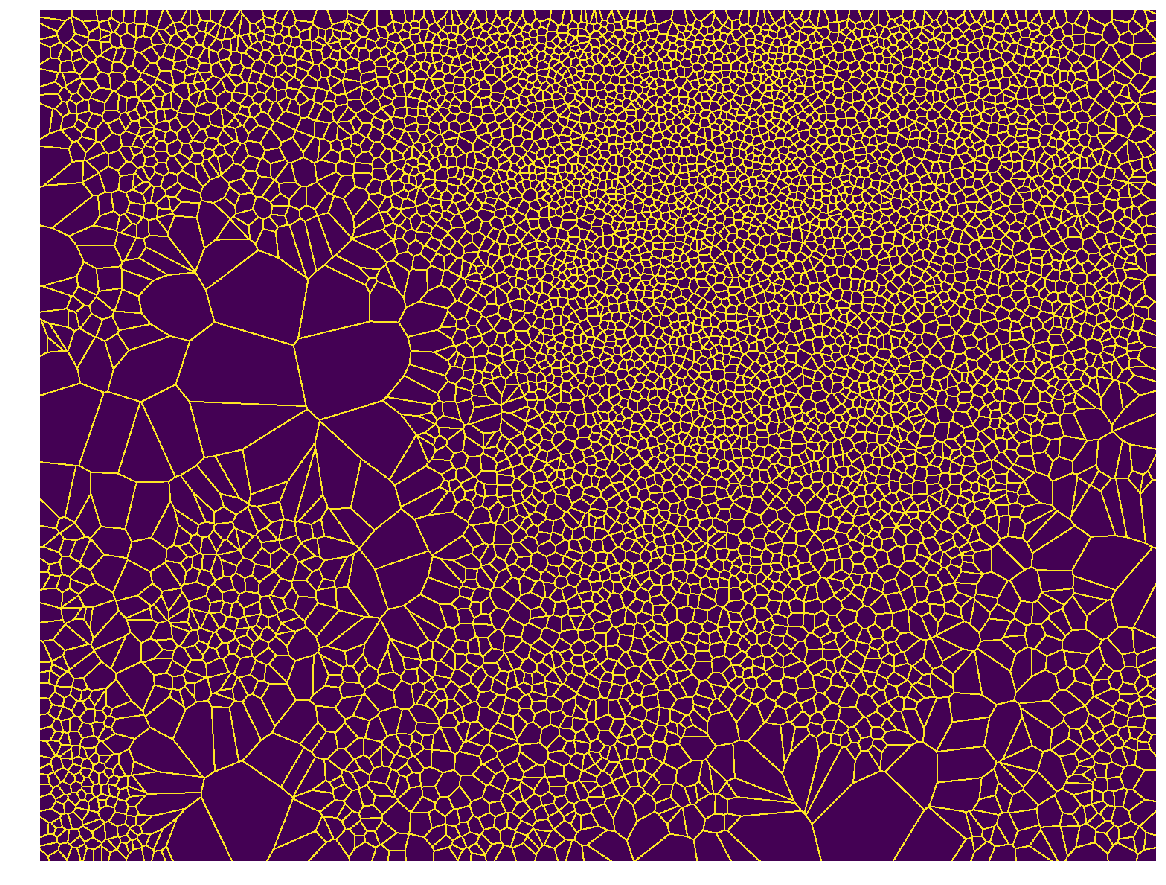

In [150]:
from skimage import filters, io
from scipy import ndimage
from skimage.color import rgb2gray


#vor_img = rgb2gray(io.imread(filename_temp))


val = filters.threshold_otsu(vor_img)

mask = vor_img > 1


mask2 = ndimage.binary_opening(mask)



#io.imshow(mask, cmap=plt.cm.gray, interpolation='nearest')


fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(mask)

ax.set_axis_off()
plt.show()


#io.show()

#labels_segment = label(mask)
#regions = clear_border(labels_segment)
#len(regions)

#a = regionprops(regions)

AttributeError: 'AxesSubplot' object has no attribute 'set_size_inches'

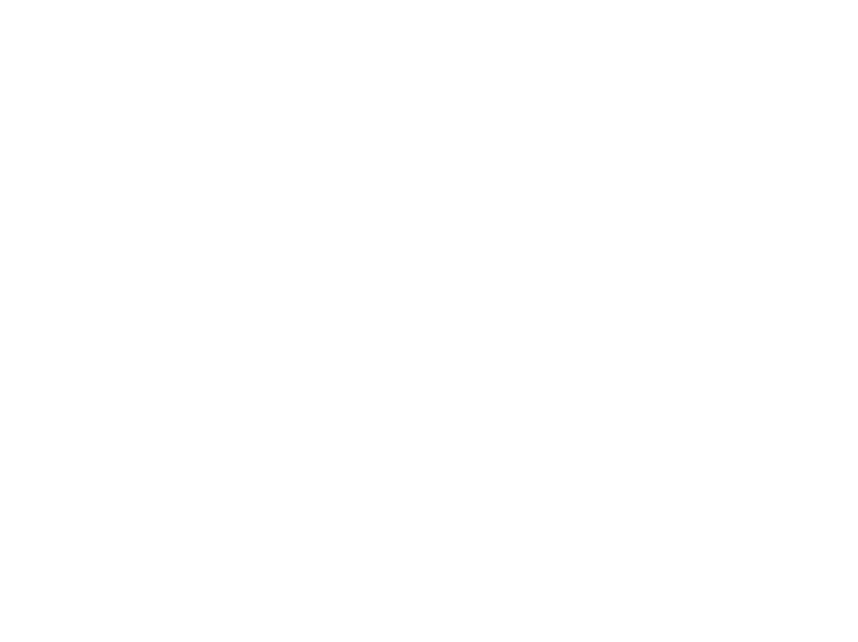

In [82]:
from pylab import rcParams
#rcParams['figure.figsize'] = 20, 20
from matplotlib.transforms import Bbox

                   
fig, ax1 = plt.subplots(figsize=(width/100, height/100), frameon=False)

ax1.xticks=[]
ax1.yticks=[]

ax1 = plt.axes(frameon=False, xticks=[],yticks=[])

ax1.set_size_inches(figsize=(width/100, height/100))
fig = voronoi_plot_2d(V, ax = ax1, show_points=False, show_vertices=False)


#ax1.set_xlim([0, width])
#ax1.set_ylim([0, height])


plt.plot(df.centroid_y,df.centroid_x, '.r')

#plt.plot(0,0,'.b')
#plt.plot(width,height,'.b')
print(width)
print(height)


plt.axis('off')
#plt.savefig("aaa.png",bbox_inches='tight')

plt.xlim([0, width])
plt.ylim([0, height])

#fig.set_size_inches(width/100, height/100)
#extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
#print(extent)
# when saving, specify the DPI
#mybox = Bbox(np.array([[0,0],[width/100,height/100]]))

print(mybox)
plt.savefig("myplot.png", dpi = 127,pad_inches=0, bbox_inches='tight', frameon=False)



In [69]:
V.regions

[[],
 [10, 8, 7, -1, 9],
 [27, 20, 19, 5, 4, 26],
 [69, 66, 62, 68],
 [88, 84, 83, 87],
 [96, 0, 95],
 [101, 98, 97, 99, 100],
 [101, 25, 6, 5, 4, 100],
 [119, 110, 112, 9, 10, 118],
 [128, 126, 127],
 [128, 39, 37, 12, 11, 126],
 [127, 36, 34, 33, 32, 3, 11, 126],
 [133, 130, 129, 131, 132],
 [130, 39, 128, 127, 36, 35, 129],
 [131, 115, 114, 124, 123, 35, 129],
 [132, 30, 31, 113, 115, 131],
 [133, 38, 120, 121, 30, 132],
 [152, 150, 149, 151],
 [154, 152, 150, 43, 153],
 [-1, 9, 112, 111, 12, 11, 3, 2],
 [210, 208, 206, 207, 209],
 [207, 202, 201, 14, 63, 206],
 [219, 61, 65, 218],
 [222, 158, 14, 201, 203, 200, 64, 221],
 [226, 218, 65, 67, 66, 69, 225],
 [229, 205, 204, 214, 213, 228],
 [231, 167, 166, 165, 164, 230],
 [232, 46, 45, 167, 231],
 [247, 244, 89, 71, 72, 246],
 [249, 245, 246, 72, 241, 240, 248],
 [263, 78, 76, 18, 17, 75, 261],
 [265, 25, 101, 98, 264],
 [269, 80, 18, 17, 56, 55, 73, 268],
 [275, 273, 271, 272, 274],
 [287, 282, 283, 285, 284, 286],
 [302, 242, 241, 

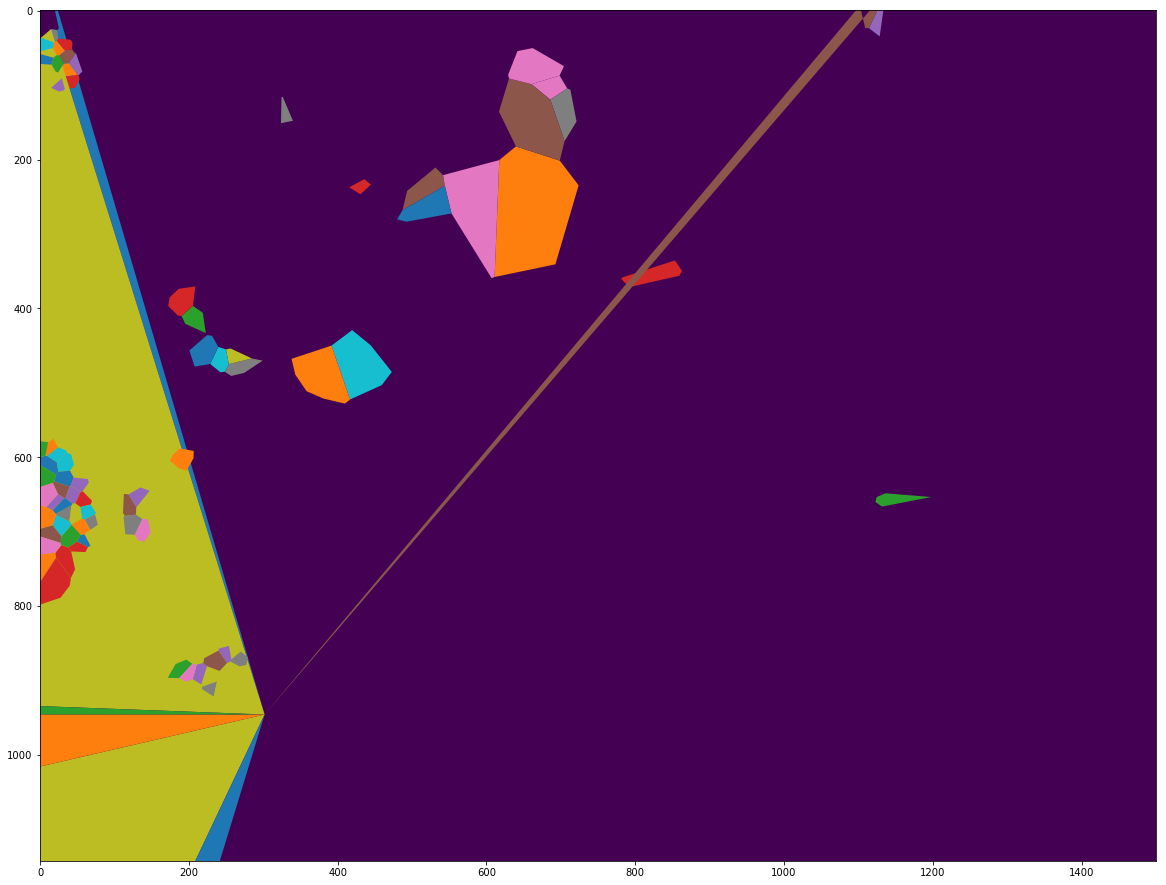

In [59]:
from PIL import Image, ImageDraw
from skimage import filters, io

# create a new image

# Image size
width = imgrgb.shape[1]
height = imgrgb.shape[0]

imgrgb = IMG.get_image_segmentation()

# Create an empty image
img = np.zeros((height, width), dtype=np.uint8)

img = img 


#for region in V.regions:

for i in range(0,100):
    region = V.regions[i]
    polygon = [V.vertices[i] for i in region]
    plt.fill(*zip(*polygon))


    
plt.imshow(img)


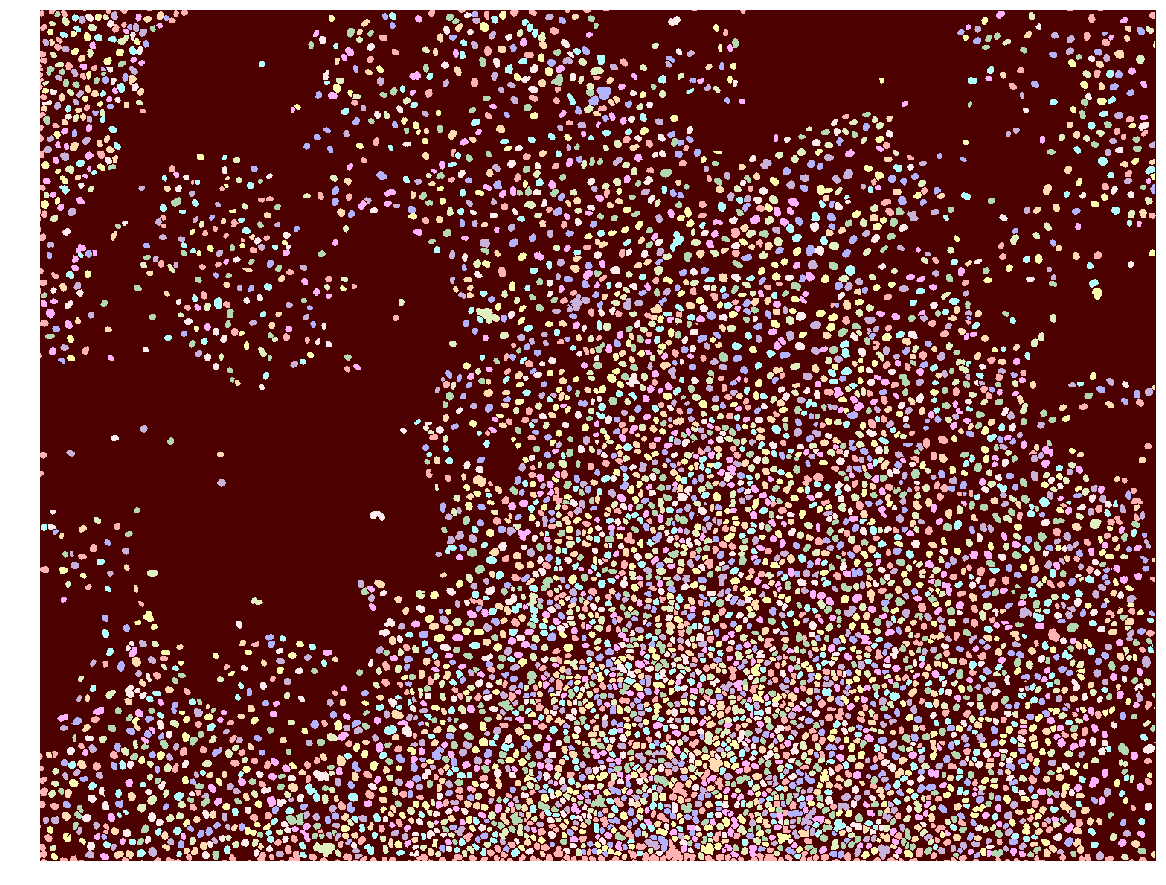

In [12]:
imgrgb = IMG.get_image_segmentation()


fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(imgrgb)

ax.set_axis_off()
plt.show()


In [5]:
type(features)

NoneType

### Plot area vs perimeter and area histogram

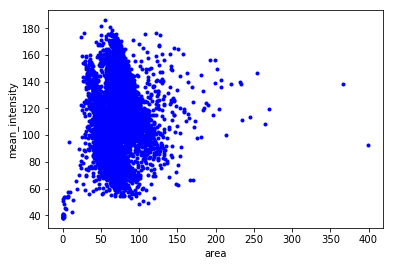

In [7]:

plt.plot(df.area, df.mean_intensity, '.b')
plt.xlabel('area')
plt.ylabel('mean_intensity')

(array([  22.,    5.,    2.,    1.,    2.,    7.,   16.,   35.,   63.,
         120.,  209.,  336.,  474.,  517.,  487.,  458.,  459.,  450.,
         419.,  366.,  301.,  252.,  180.,  144.,  116.,   92.,   63.,
          60.,   43.,   37.,   31.,   23.,   20.,   10.,    8.,   11.,
           9.,    5.,    5.,    4.,    4.,    2.,    4.,    2.,    0.,
           4.,    2.,    2.,    1.,    2.,    1.,    3.,    0.,    1.,
           0.,    1.,    0.,    0.,    3.,    0.,    0.,    1.,    0.,
           1.,    0.,    0.,    1.,    1.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([   1.  ,    4.98,    8.96,   12.94,   16.92,   20.9 ,   24.88,
          28.86,   32.84,   36.82,   40.8 ,   44.78,   48.76,   52.74,
          56.72,   60.7 ,   64.68,   68.66,   72.64,   76.62,   80.6

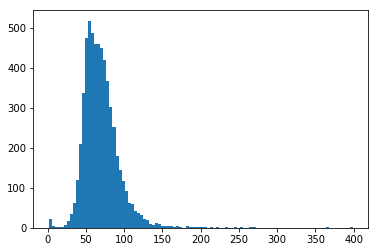

In [13]:
plt.hist(df.area,100)

### Show the region centroids

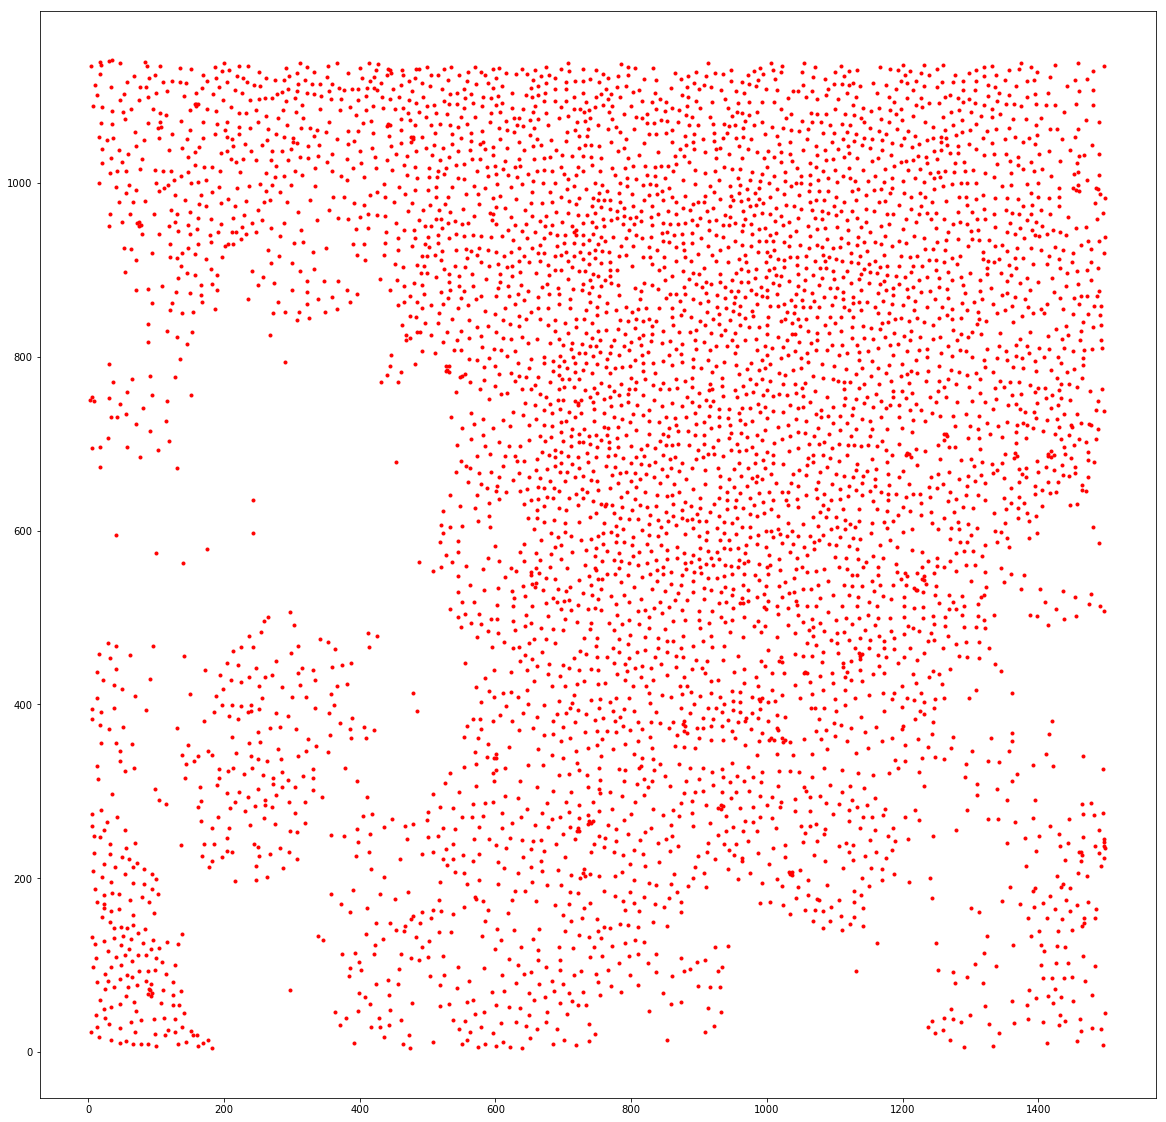

In [22]:

import numpy as np
a = np.array(df.centroid)
x=[]
y=[]
for i in a:
    x.append(i[0])
    y.append(i[1])

    
fig, axes = plt.subplots(figsize=(20, 20), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})

plt.plot(y,x, '.r')

## Storage: Business and data layer 

<img src="8.png">

In [2]:
import image_features_extraction.Images as fe

    
IMGS = fe.Images('../images/CA')



('Error: folder name does not exist',)


In [24]:
import image_features_extraction.Images as fe

    
IMGS = fe.Images('../images/EDGE')

storage_name = '../images/DB1.csv'
class_value = 1

for IMG in IMGS:
    print(IMG.file_name())
    
    REGS = IMG.regions()
    
    FEATURES = REGS.features(['area','perimeter', 'extent', 'equivalent_diameter', 'eccentricity'], class_value=class_value)
    
    FEATURES.save(storage_name, type_storage='file', do_append=True)
    
    
    

../images/EDGE/ca_1.tif
../images/EDGE/ca_2.tif
../images/EDGE/ca_3.tif


# Pytest: Units test

In [4]:
!py.test

============================= test session starts ==============================
platform darwin -- Python 3.5.3, pytest-3.1.3, py-1.4.34, pluggy-0.4.0
rootdir: /Users/remi/Google Drive/INSIGHT PRJ/PRJ/Image-Features-Extraction, inifile:
collected 0 items 

========================= no tests ran in 0.00 seconds =========================


In [58]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import itertools

import pandas as pd
import numpy as np
df_train=pd.read_csv(storage_name)

n = df_train.shape[1]

X = df_train.iloc[:,0:n-1]
Y = df_train.iloc[:,n-1]

Xtrain,Xtest, Ytrain,Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 30)

0.662082514735
[ 0.74477868  0.25522132]
             precision    recall  f1-score   support

          0       0.68      0.91      0.78       656
          1       0.57      0.21      0.30       362

avg / total       0.64      0.66      0.61      1018

Confusion matrix, without normalization
[[599  57]
 [287  75]]


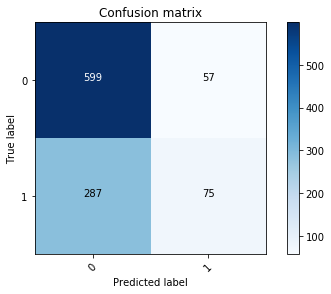

In [60]:
params = {'n_estimators': 3000, 'max_depth': 2, 'min_samples_split': 2,
         'learning_rate': 0.001}
model_gb = GradientBoostingClassifier(**params)
model_gb.fit(Xtrain,Ytrain)
Y_pred = model_gb.predict(Xtest)

print(model_gb.score(Xtest, Ytest))
print(model_gb.predict_proba(Xtest)[0])
print(classification_report(Ytest,Y_pred, target_names=['0','1']))

cm = metrics.confusion_matrix(Ytest, Y_pred)
plot_confusion_matrix(cm, ['0','1'])

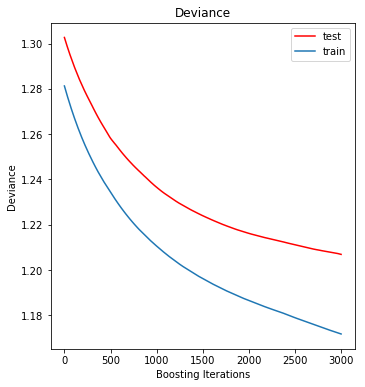

In [61]:
ne = len(model_gb.estimators_)
test_error = np.empty(ne)

for i,pred in enumerate(model_gb.staged_decision_function(Xtest)):
    test_error[i] = model_gb.loss_(np.array(Ytest), pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(ne), test_error, '-r', label='test')
plt.plot(np.arange(ne), model_gb.train_score_, label='train')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

In [62]:
a = pd.DataFrame(Ytrain)
a = a.iloc[:,0].value_counts()
print('number of observations/class')
print(a)

number of observations/class
0    1568
1     806
Name: class_name, dtype: int64


In [68]:
def sample_weights(Y):
    sample_weights = np.empty(len(Y))

    w = pd.DataFrame(Y)
    a = np.array(w.iloc[:,0].value_counts())

    w[w.class_name==0] = 0.50/a[0]
    w[w.class_name==1] = 0.50/a[1]

    return np.array(w)*1000

sw = sample_weights(Ytrain)

/Users/remi/anaconda/envs/remi_insight/lib/python3.5/site-packages/sklearn/ensemble/gradient_boosting.py:978: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  sample_weight = column_or_1d(sample_weight, warn=True)


0.636542239686
[ 0.74325475  0.25674525]
             precision    recall  f1-score   support

          0       0.77      0.62      0.69       656
          1       0.49      0.67      0.57       362

avg / total       0.67      0.64      0.64      1018

Confusion matrix, without normalization
[[407 249]
 [121 241]]


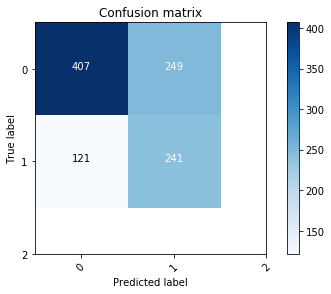

In [70]:
params = {'n_estimators': 3000, 'max_depth': 2, 'min_samples_split': 3,
         'learning_rate': 0.01}
model_gb = GradientBoostingClassifier(**params)
#model_gb = GradientBoostingClassifier(n_estimators=1000)
model_gb.fit(Xtrain,Ytrain, sample_weight= sw)
Y_pred = model_gb.predict(Xtest)
print(model_gb.score(Xtest, Ytest))
print(model_gb.predict_proba(Xtest)[0])
print(classification_report(Ytest,Y_pred, target_names=['0','1','2','3']))
cm = metrics.confusion_matrix(Ytest, Y_pred)
plot_confusion_matrix(cm, ['0','1','2'])

In [67]:
sw

array([[ 0.31887755],
       [ 0.        ],
       [ 0.        ],
       ..., 
       [ 0.31887755],
       [ 0.        ],
       [ 0.        ]])

# Voronoi class

In [352]:
#!/usr/bin/env python3
import numpy as np
import pandas as pd
from scipy.spatial import Voronoi, voronoi_plot_2d
from skimage.measure import label, regionprops

from skimage.draw import ellipse, polygon, polygon_perimeter


class MyException(Exception):
    pass


class MyVoronoi(object):
    """
    This class contains a collection of images

    :param  xypoints: [(x,y), ...] sets of points from which to build the voronoi diagram
    :type xypoints: List of  (x,y) pairs
    :param  image_width: width of the original image from which the points are derived
    :type image_width: int
    :param  image_width: height of the original image from which the points are derived
    :type image_width: int
    :returns: an instance of the object Voronoi
    :rtype: object
    :example:
    >>> import voronoi-features as ve
    >>> V = ve.Voronoi([X,Y],1000,500)
    """
    # to implement the class as a collection this object inherits the abstract class my_iterator
    def __init__(self, xypoints, image_width, image_height):
        try:
            self.__xypoints = xypoints
            self.__image_width = image_width
            self.__image_height = image_height
            self.__VOR = None
            
            self.__image = np.zeros([image_height, image_width])
            self.__image_voromap = np.zeros([image_height, image_width])
            
            #self.image = self.__image
            #self.__X = [xy[0] for xy in xypoints]
            #self.__Y = [xy[1] for xy in xypoints]
            
            self.__make_voronoi()
            self.__make_voro_map()
            #self.VOR = self.__VOR
            
        except MyException as e:
            print(e.args)

    
    def get_voronoi_map(self):
        """
        returns the vornoi image in which the region pixels values are all equal to the index of the points array
        used to calculate the voronoi diagram
        This voronoi image is used as data strcuture to determine the points index related to a voronoi region
        
        :return: voronoi image
        :rtype: 2d array
        """
        return self.__image_voromap

    
    def __make_voronoi(self):
        """
        make the vornoi image in which the region pixels values are all equal to the index of the points array
        used to calculate the voronoi diagram. This voronoi image is used as data strcuture to determine the points index related to a voronoi region
        
        """
        self.__VOR = Voronoi(self.__xypoints)
    
    
    def __make_voro_map(self):
        
        """
        
        """
        n = len(self.__xypoints)
        
        # loop on all points (centroids) of the single voronoi region
        for xy_idx in range(0,n):
            # gets the index of a voronoi region
            reg_idx = self.__VOR.point_region[xy_idx]
            # gets the voronoi region
            region = self.__VOR.regions[reg_idx]
            # calculates the polygon of the region
            poly = self.__VOR.vertices[region]
            #print("polygon:{}".format(poly))
            #print("prod:{}".format(poly.min()))
            c0 = poly.min()
            c1 = poly[:,0].max()
            c2 = poly[:,1].max()
            
            if (c0>0) & (c2<self.__image_width) & (c1<self.__image_height):
                #  build the x and y vectors of the x and y polygon coordinates
                x = poly[:,0]
                y = poly[:,1]
                # fills with values 1 the pixels of the region polygon on the temporary refering to the entire voronoi diagram
                rr, cc = polygon(x, y)
                #rrp,ccp = polygon_perimeter(x,y)
                #print("rr:{}".format(rr.max()))
                #print("cc:{}".format(cc.max()))
                self.__image_voromap[rr, cc] = xy_idx
                #self.__image_voromap[rrp, ccp] = 0
                
        return self.__image_voromap
        
        
    def regions(self):
        try:
            return -1
        except Exception as e:
            raise
            
            
    def __insert_values(self, feature_name, df, values):
        if feature_name =='centroid':
            a = np.array(values)
            x=[]
            y=[]
            for i in a:
                x.append(i[0])
                y.append(i[1])
            df['centroid_x'] = x
            df['centroid_y'] = y
            return 2

        df[feature_name] = values
        return 1

    
    def features(self, props_name):
        """
        measure the properties with given input names 
        it uses an internal pixel representation of the voronoi 
        
        for each voronoi regions (or tassel) and return a pandas data frame
        :param props_name: list of property names
        :type props_name: list od strings
        :return: a data frame with the properties values as columns for each voronoi tassel
        :rtype: pandas data frame
        """
        try:
            df = pd.DataFrame()

            labs = label(self.__image_voromap)
            region_props = regionprops(labs)
            m = len(props_name)
            num_reg = len(region_props)

            # add the ID by using the __image_voromap
            IDs = []
            for preg in region_props:
                centroid = getattr(preg, 'centroid')
                ID = self.__image_voromap[np.int(centroid[0]), np.int(centroid[1])]
                IDs.append(np.int(ID))
            self.__insert_values('id',df,IDs)

            # add the prop values 
            for pname in props_name:
                vals = []
                for preg in region_props:
                    vals.append(getattr(preg, pname))
                self.__insert_values(pname,df,vals)

            return df
        except Exception as e:
            print(e.args)
            return None

    
    
       

../images/CA/1/ORG_8bit.tif
../images/CA/1/ORG_bin.tif


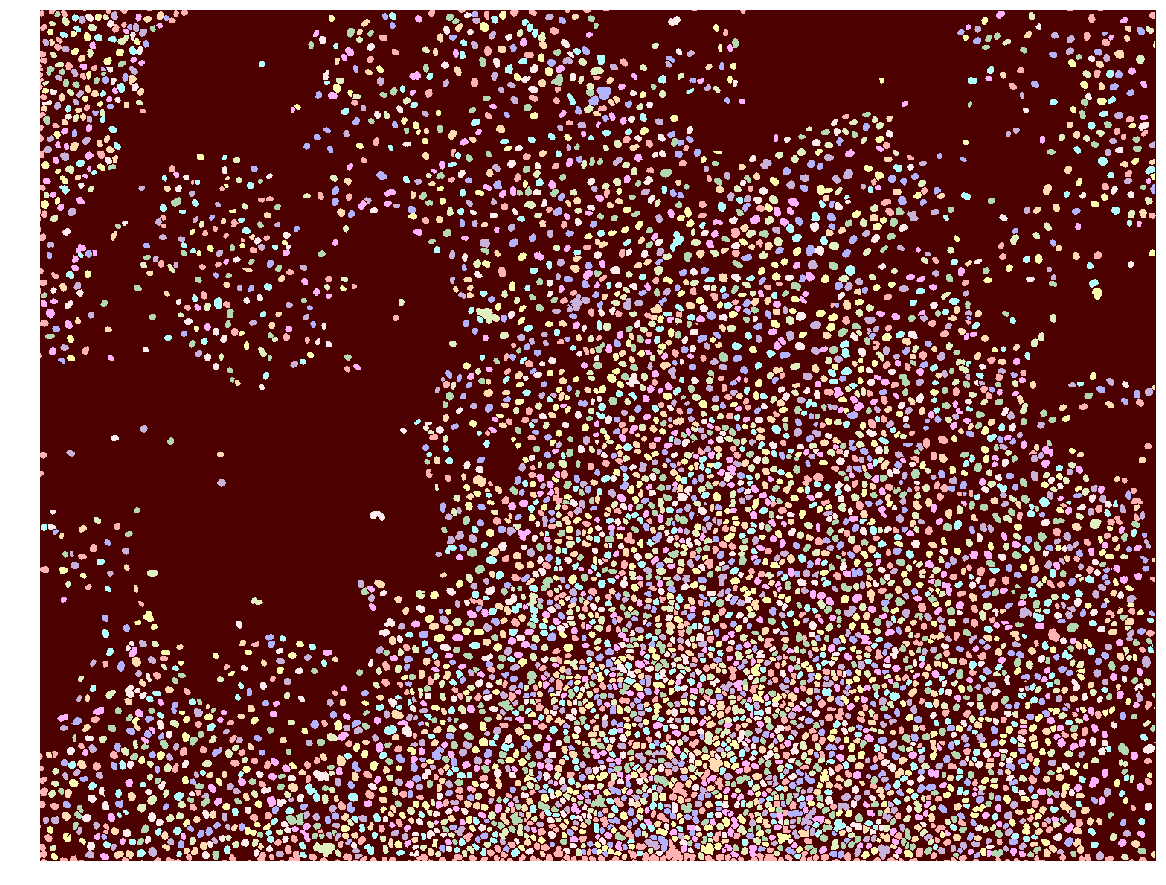

In [5]:
% matplotlib inline
import matplotlib.pyplot as plt
import image_features_extraction.Images as fe

    
IMGS = fe.Images('../images/CA/1')


# the iterator at work ...
for IMG in IMGS:
    print(IMG.file_name())
    
IMG = IMGS.item(1)

IMG.set_image_intensity(IMGS.item(0))

imgrgb = IMG.get_image_segmentation()


fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(imgrgb)

ax.set_axis_off()
plt.show()



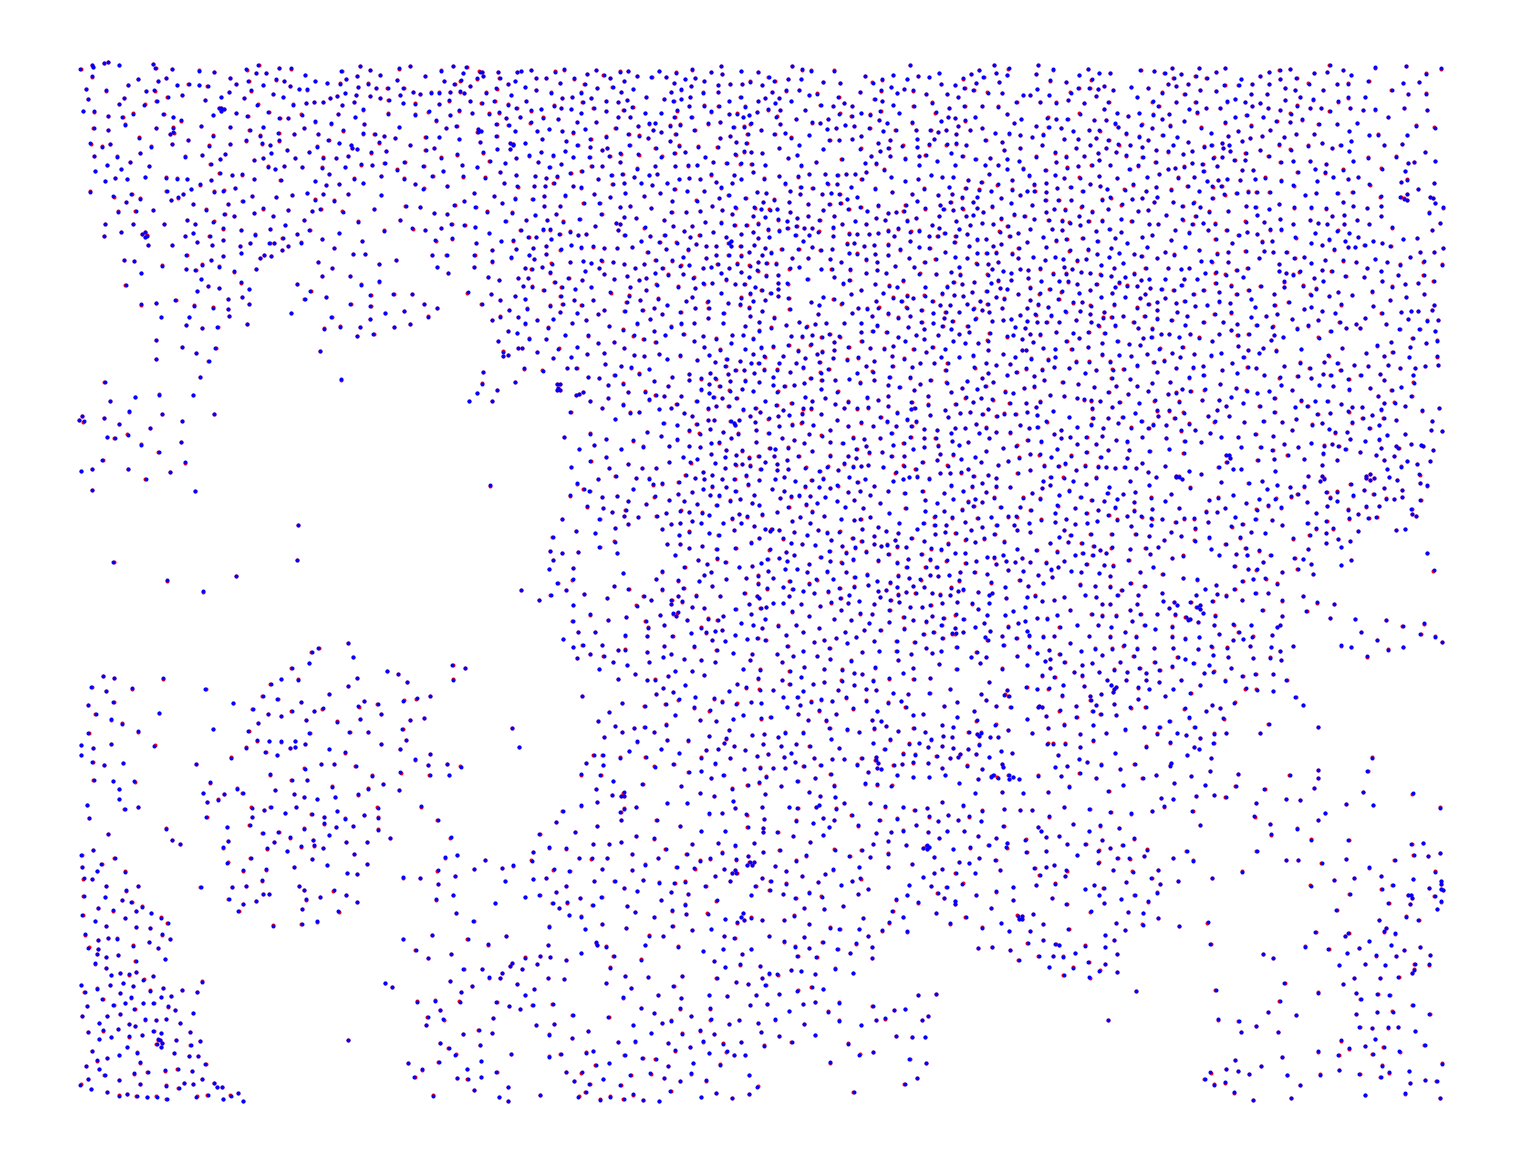

In [233]:
IMG = IMGS.item(0)

features = IMG.features(['label', 'area','perimeter', 'centroid'], class_value=5)

df = features.get_dataframe()

df.head()

# Get x and y coordinates (ra and dec from the dataframe) into a
# numpy array to feed to the VT method
width = imgrgb.shape[1]
height = imgrgb.shape[0]

y = [i for i in df.centroid_y]
x = [i for i in df.centroid_x]

dpi = 72.
xinch = width / dpi
yinch = height / dpi

fig = plt.figure(figsize=(xinch,yinch))

ax = plt.axes([0., 0., 1., 1.], frameon=False, xticks=[],yticks=[])


plt.plot(np.round(y),np.round(x), '.r')

plt.plot(y,x, '.b')

In [312]:
XY = np.ceil([xy for xy in zip(x,y)])

In [313]:
XY

array([[    5.,   183.],
       [    6.,  1291.],
       [   10.,   586.],
       ..., 
       [ 1140.,    30.],
       [ 1139.,    84.],
       [ 1141.,    35.]])

In [365]:
VOR = MyVoronoi(XY, width, height)

In [366]:
IMG_VOR = VOR.get_voronoi_map()

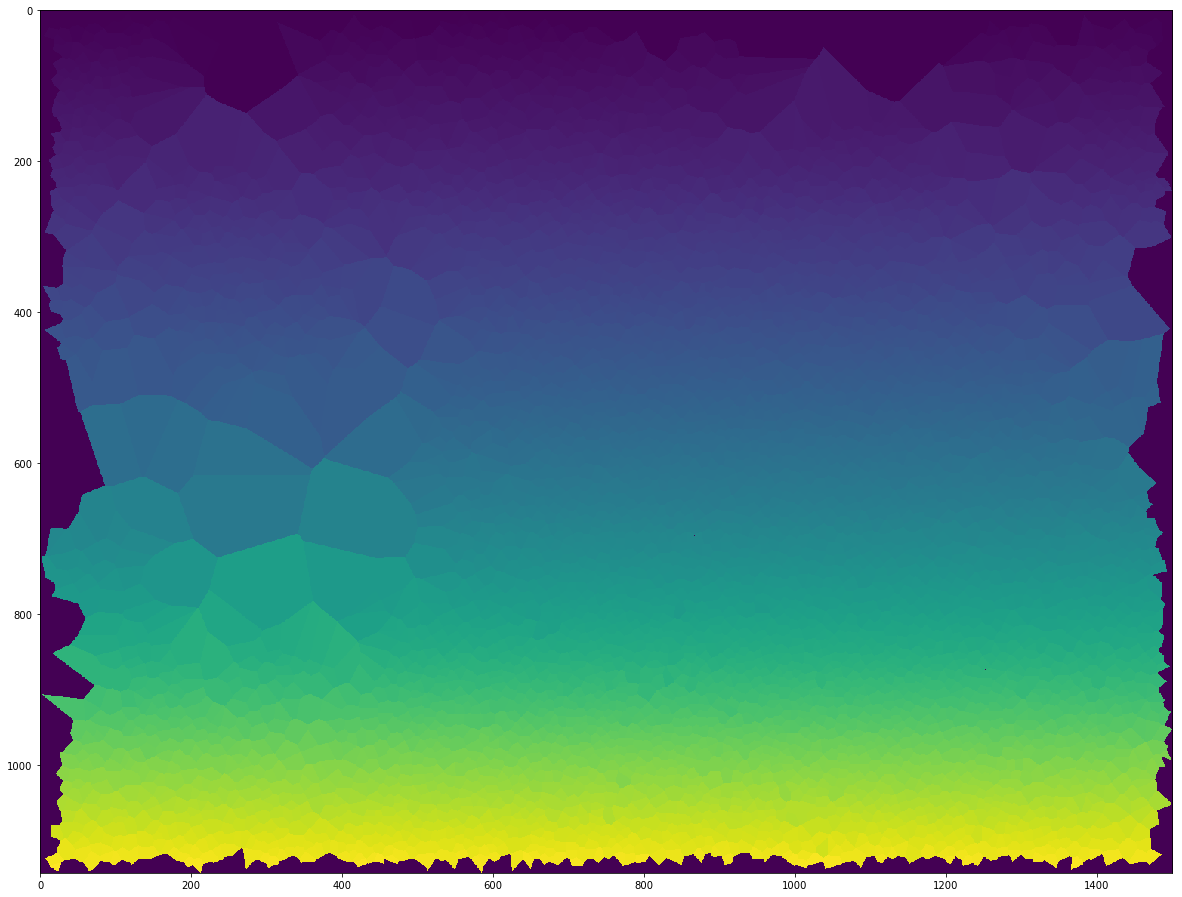

In [367]:
fig = plt.figure(figsize=(xinch,yinch))
plt.imshow(IMG_VOR)
#plt.plot(XY,'.r')

In [368]:
df = VOR.props_values2(['area','perimeter','centroid'])

In [369]:
df

id  area   perimeter   centroid_x   centroid_y
0       34   182   58.355339    13.560440   560.076923
1       26   269   68.769553    15.650558   613.059480
2       40   244   64.426407    16.467213   113.278689
3       63   558   94.982756    26.222222   413.482079
4       95   650  113.355339    31.607692  1385.253846
5       31  2653  227.663997    46.789295   202.463249
6       61   422   89.183766    28.407583  1478.426540
7       50   358   75.982756    25.393855   663.871508
8       52    86   35.798990    17.941860   153.372093
9       76   424   81.840620    26.608491  1429.938679
10      41   637  100.461941    24.609105   480.313972
11      59   271   73.698485    24.291513  1462.911439
12      56   231   61.941125    25.636364  1260.900433
13      39   269   63.455844    23.345725    97.152416
14      43   468  109.775649    33.837607   168.628205
15      58   312   72.669048    23.814103   542.830128
16      42   292   65.254834    24.202055   595.955479
17      48   170   51.798990    22.976471   129.241176
18     111  2221  215.137085    51.058082   347.357046
19      49   215   58.526912    24.781395   564.367442
20      46   242   62.183766    24.066116    70.760331
21      73   693  112.568542    32.616162  1325.839827
22      47   151   51.698485    27.463576   117.761589
23      66   174   51.935029    28.339080   429.689655
24      67   315   69.112698    29.279365   579.168254
25      70   281   68.698485    29.377224   643.565836
26      60   387   78.704581    29.379845   691.317829
27      81   607  100.769553    34.690280  1406.212521
28      57   329   69.112698    30.501520    48.142857
29      55   251   73.562446    31.243028   153.868526
...    ...   ...         ...          ...          ...
5128  5271   154   47.384776  1122.597403  1321.116883
5129  5294   242   62.941125  1124.330579    19.111570
5130  5273   134   44.627417  1122.537313   297.268657
5131  5260   115   44.627417  1122.147826   421.530435
5132  5280   210   59.870058  1125.604762   515.580952
5133  5304   243   62.319805  1124.506173  1025.251029
5134  5307   126   43.349242  1123.444444   449.269841
5135  5279   159   52.006097  1123.761006   504.622642
5136  5266   128   41.870058  1123.828125   667.359375
5137  5247   202   54.727922  1124.000000   780.257426
5138  5269   170   49.798990  1123.964706   910.376471
5139  5301   158   47.698485  1124.930380   996.835443
5140  5275   127   46.798990  1124.133858   586.614173
5141  5276   115   44.798990  1125.469565   679.773913
5142  5281   175   51.556349  1123.114286   796.068571
5143  5277   126   42.627417  1123.222222  1113.285714
5144  5263   221   58.284271  1125.208145  1339.203620
5145  5297   128   48.041631  1124.273438   465.531250
5146  5298   170   58.148232  1129.082353   579.282353
5147  5305   333   73.455844  1127.213213  1047.729730
5148  5291   153   47.213203  1125.934641  1227.261438
5149  5296   178   52.041631  1127.292135   307.752809
5150  5285    99   37.006097  1124.474747  1204.040404
5151  5317   125   41.798990  1128.016000   197.056000
5152  5333   191   55.006097  1128.853403  1371.518325
5153  5309   155   48.384776  1128.522581   709.845161
5154  5303   180   52.284271  1130.950000   209.100000
5155  5323   116   45.041631  1128.896552   425.043103
5156  5312   128   43.935029  1129.601562  1008.515625
5157  5364    96   40.970563  1134.166667    20.614583

[5158 rows x 5 columns]

In [317]:
L = label(IMG_VOR)
region_props = regionprops(L) # only a single region

XY2 = []
for p in region_props:
    XY2.append(p.centroid)

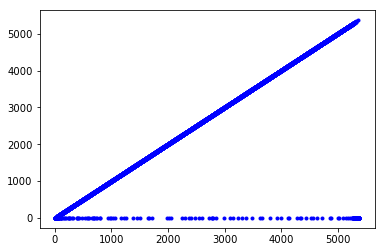

In [327]:
nn = len(XY)
I1 = range(0,nn)
I2 = []
for i in I1:
    p = XY[i]
    I2.append(IMG_VOR[np.int(p[0]),np.int(p[1])])

plt.plot(I1, I2,'.b')

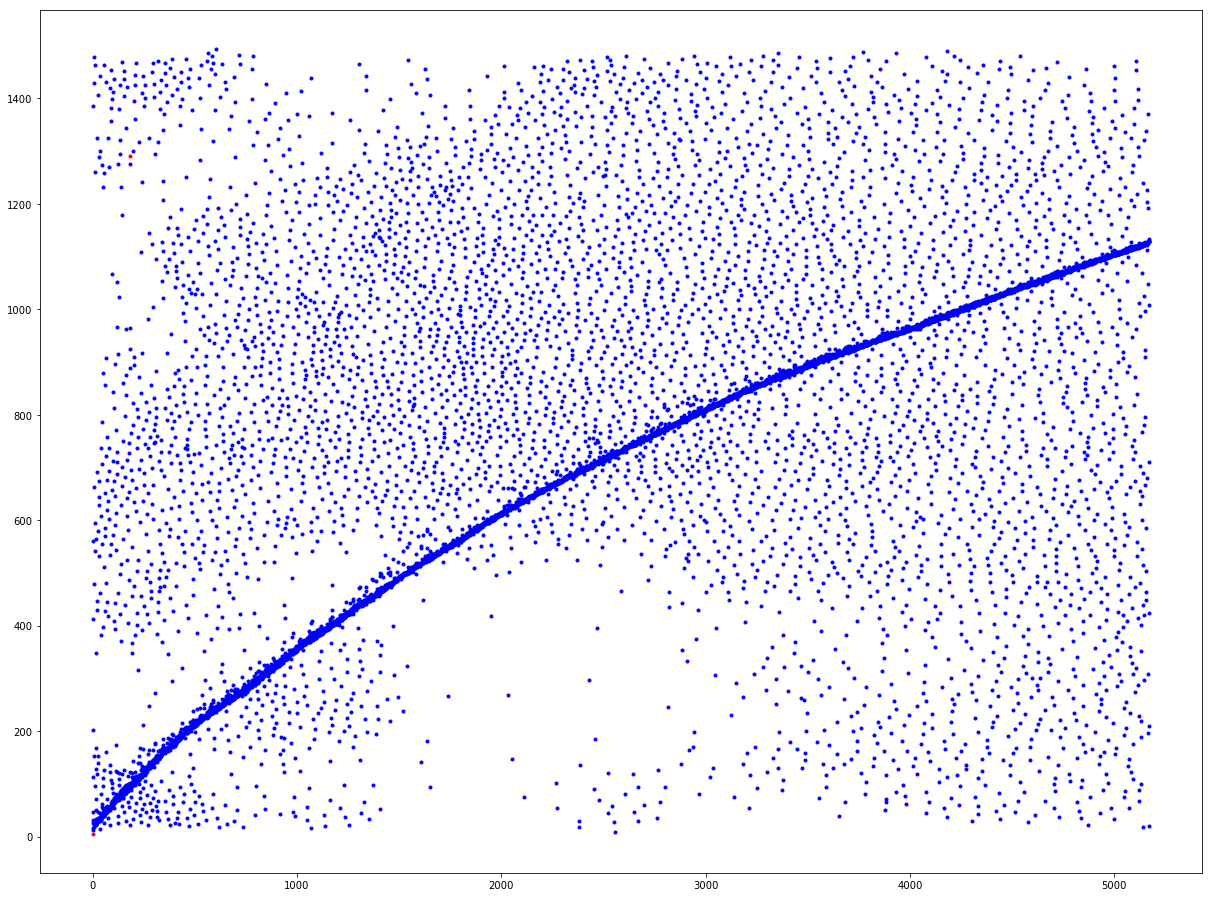

In [305]:
fig = plt.figure(figsize=(xinch,yinch))

plt.plot(XY[0],XY[1],'.r')
plt.plot(XY2,'.b')


In [256]:
df = VOR.props_values(['area','area'])

KeyboardInterrupt: 

In [79]:
l = ['area','centroids']
m = len(l)
n=1143
df = pd.DataFrame(np.zeros((n, m)))
df.columns = l

In [226]:
df

area  area
0      0.0   0.0
1      0.0   0.0
2      0.0   0.0
3      0.0   0.0
4      0.0   0.0
5      0.0   0.0
6      0.0   0.0
7      0.0   0.0
8      0.0   0.0
9      0.0   0.0
10     0.0   0.0
11     0.0   0.0
12     0.0   0.0
13     0.0   0.0
14     0.0   0.0
15     0.0   0.0
16     0.0   0.0
17     0.0   0.0
18     0.0   0.0
19     0.0   0.0
20     0.0   0.0
21     0.0   0.0
22     0.0   0.0
23     0.0   0.0
24     0.0   0.0
25     0.0   0.0
26     0.0   0.0
27     0.0   0.0
28     0.0   0.0
29     0.0   0.0
...    ...   ...
5354   0.0   0.0
5355   0.0   0.0
5356   0.0   0.0
5357   0.0   0.0
5358   0.0   0.0
5359   0.0   0.0
5360   0.0   0.0
5361   0.0   0.0
5362   0.0   0.0
5363   0.0   0.0
5364  96.0  96.0
5365   0.0   0.0
5366   0.0   0.0
5367   0.0   0.0
5368   0.0   0.0
5369   0.0   0.0
5370   0.0   0.0
5371   0.0   0.0
5372   0.0   0.0
5373   0.0   0.0
5374   0.0   0.0
5375   0.0   0.0
5376   0.0   0.0
5377   0.0   0.0
5378   0.0   0.0
5379   0.0   0.0
5380   0.0   0.0
5381   0.0   0.0
5382   0.0   0.0
5383   0.0   0.0

[5384 rows x 2 columns]

In [155]:
props_name = ['area','area']

n = 1
m = len(props_name)

df = np.zeros((n,m))

# create the data frame
xy_idx = 100
# gets the index of a voronoi region
reg_idx = VOR.VOR.point_region[xy_idx]
# gets the voronoi region
region = VOR.VOR.regions[reg_idx]
# calculates the polygon of the region
poly = VOR.VOR.vertices[region]
print(poly)
if poly.prod()>0:
    #  build the x and y vectors of the x and y polygon coordinates
    x = [a[0] for a in poly]
    y = [a[1] for a in poly]
    # fills with values 1 the pixels of the region polygon on the temporary refering to the entire voronoi diagram
    rr, cc = polygon(y, x)
    print(rr)
    print(cc)
    VOR.image[rr, cc] = 1
    # calculate the properties using skimage
    region_props = regionprops(label(VOR.image))[0] # only a single region
    # reset the pixel to 0
    VOR.image[rr, cc] = 0
    for p in range(0,m):
        #vals.append(getattr(region_props, prop_name))
        df[0, p] = getattr(region_props, props_name[p])
else:
    
df2 = pd.DataFrame(df)
df2.columns = props_name

df2


[[  34.24921523  654.36193514]
 [  39.50563353  639.33971642]
 [  41.09903754  638.70018377]
 [  54.54878723  646.58011787]
 [  47.63855978  662.12177207]
 [  42.41276438  662.75163467]
 [  40.08038654  662.02151905]]
[639 640 640 640 640 641 641 641 641 641 641 641 642 642 642 642 642 642
 642 642 643 643 643 643 643 643 643 643 643 643 644 644 644 644 644 644
 644 644 644 644 644 644 644 645 645 645 645 645 645 645 645 645 645 645
 645 645 645 646 646 646 646 646 646 646 646 646 646 646 646 646 646 646
 646 647 647 647 647 647 647 647 647 647 647 647 647 647 647 647 647 647
 647 648 648 648 648 648 648 648 648 648 648 648 648 648 648 648 648 648
 649 649 649 649 649 649 649 649 649 649 649 649 649 649 649 649 649 650
 650 650 650 650 650 650 650 650 650 650 650 650 650 650 650 650 650 651
 651 651 651 651 651 651 651 651 651 651 651 651 651 651 651 651 652 652
 652 652 652 652 652 652 652 652 652 652 652 652 652 652 652 653 653 653
 653 653 653 653 653 653 653 653 653 653 653 653 653

area   area
0  305.0  305.0

(43.276923076923076, 649.16923076923081)


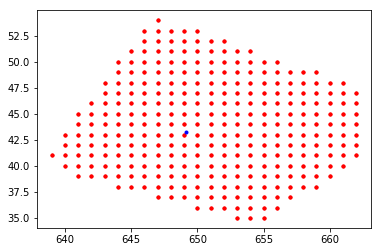

In [164]:

plt.plot(rr,cc,'.r')
plt.plot(rr,cc,'.r')
plt.plot(XY[100][1],XY[100][0],'.b')
print(XY[100])

In [128]:
poly

[array([  -3.39484751,  170.72165842]),
 array([-327.33267561,  129.43869361]),
 array([  490.8347876 ,  1195.86942792]),
 array([ -2.66924263e+07,   2.65768478e+04]),
 array([-148610.25773994,     556.5       ]),
 array([-1465.96402982,   330.573971  ]),
 array([ -73.18388679,  289.43554089]),
 array([ -37.09675318,  284.38510863]),
 array([  43.53756933,  237.02833418]),
 array([   6.81783306,  175.58671877])]

In [129]:
region

[2061, 181, -1, 971, 970, 8, 65, 66, 71, 2060]

In [201]:
poly[:,1]

array([ 654.36193514,  639.33971642,  638.70018377,  646.58011787,
        662.12177207,  662.75163467,  662.02151905])

In [200]:
poly

array([[  34.24921523,  654.36193514],
       [  39.50563353,  639.33971642],
       [  41.09903754,  638.70018377],
       [  54.54878723,  646.58011787],
       [  47.63855978,  662.12177207],
       [  42.41276438,  662.75163467],
       [  40.08038654,  662.02151905]])

In [227]:
XY

[(4.5526315789473681, 182.63157894736841),
 (5.625, 1290.3611111111111),
 (9.8017241379310338, 585.10344827586209),
 (6.895833333333333, 600.14583333333337),
 (6.4705882352941178, 621.58823529411768),
 (7.4461538461538463, 99.430769230769229),
 (7.2857142857142856, 161.18571428571428),
 (7.8615384615384611, 1332.3846153846155),
 (6.5609756097560972, 574.29268292682923),
 (9.3076923076923084, 77.953846153846158),
 (5.0, 474.0),
 (5.0, 639.0),
 (10.1, 66.242857142857147),
 (9.6595744680851059, 131.80851063829786),
 (9.0384615384615383, 463.92307692307691),
 (9.617647058823529, 550.57352941176475),
 (8.5, 718.77777777777783),
 (11.097222222222221, 1413.25),
 (10.607843137254902, 46.686274509803923),
 (9.8235294117647065, 88.17647058823529),
 (10.720930232558139, 391.46511627906978),
 (9.4800000000000004, 685.32000000000005),
 (12.732394366197184, 56.267605633802816),
 (11.65079365079365, 144.11111111111111),
 (10.861111111111111, 169.38888888888889),
 (11.5, 508.35000000000002),
 (12.3835

In [231]:
XY # this is xy of the image 

# use the KDTree to order them 



array([[    5.,   183.],
       [    6.,  1290.],
       [   10.,   585.],
       ..., 
       [ 1140.,    30.],
       [ 1139.,    84.],
       [ 1141.,    35.]])